In [29]:
import geopandas as gpd

# Replace with your .shp file path
shapefile_path =  r"C:\Users\Elangovan\Documents\geomorphology_250k_gcs_ngdr.shp"
gdf = gpd.read_file(shapefile_path)

print(gdf.head())
print(gdf.columns)

    gid    shape_leng                                  descriptio  \
0  4478  11037.459548  Low Dissected Structural Hills and Valleys   
1  3343   2114.702171  Low Dissected Structural Hills and Valleys   
2  3370   4308.889878  Low Dissected Structural Hills and Valleys   
3  3405   1388.612184  Low Dissected Structural Hills and Valleys   
4  3475   3076.286135  Low Dissected Structural Hills and Valleys   

                        legend_sho  shape_area  shape_len  \
0  Low Dissected Hills and Valleys         0.0        0.0   
1  Low Dissected Hills and Valleys         0.0        0.0   
2  Low Dissected Hills and Valleys         0.0        0.0   
3  Low Dissected Hills and Valleys         0.0        0.0   
4  Low Dissected Hills and Valleys         0.0        0.0   

                                            geometry  
0  POLYGON ((76.45729 14.03703, 76.45766 14.03688...  
1  POLYGON ((76.84565 13.81585, 76.84604 13.81525...  
2  POLYGON ((76.44843 13.75, 76.44554 13.75, 76.4... 

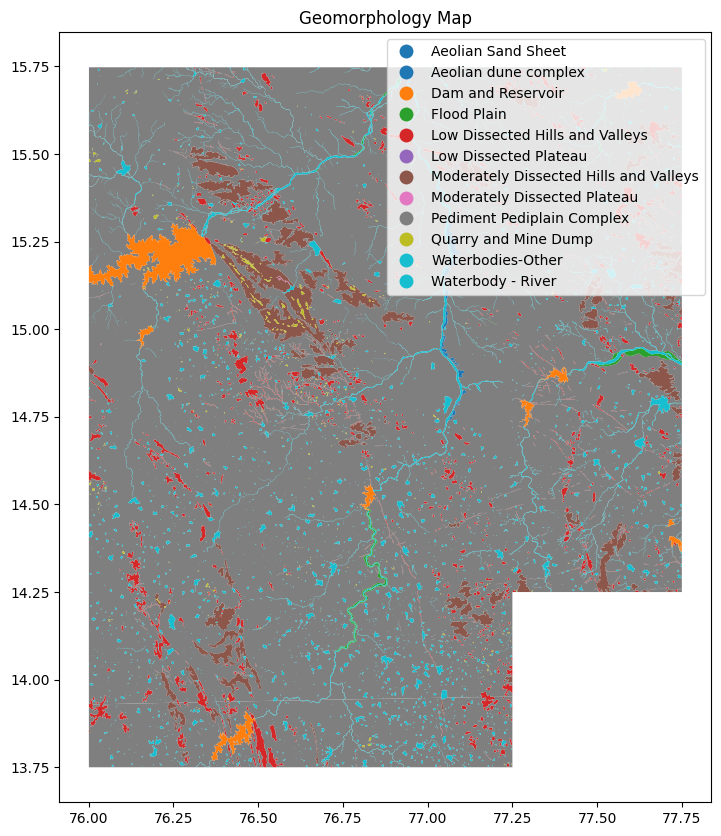

In [30]:
import matplotlib.pyplot as plt

gdf.plot(column='legend_sho', legend=True, figsize=(10, 10))
plt.title("Geomorphology Map")
plt.show()

In [31]:
# Reproject to UTM (zone depends on location – Karnataka is ~43N)
gdf_utm = gdf.to_crs(epsg=32643)

# Recalculate
gdf_utm['area_m2'] = gdf_utm.area
gdf_utm['perimeter_m'] = gdf_utm.length

print(gdf_utm[['descriptio', 'area_m2', 'perimeter_m']].head())

                                   descriptio       area_m2   perimeter_m
0  Low Dissected Structural Hills and Valleys  2.710189e+06  11007.917096
1  Low Dissected Structural Hills and Valleys  1.025570e+05   2110.454902
2  Low Dissected Structural Hills and Valleys  4.023135e+05   3349.351464
3  Low Dissected Structural Hills and Valleys  3.819353e+04   1385.800114
4  Low Dissected Structural Hills and Valleys  2.816365e+05   3067.881903


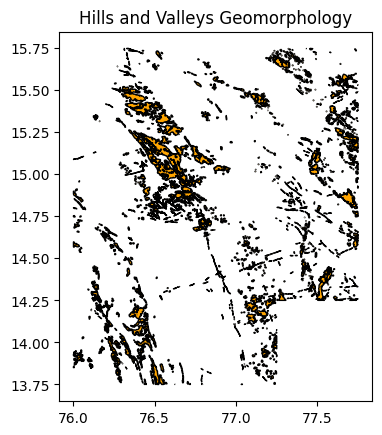

In [32]:
hills = gdf[gdf['legend_sho'].str.contains("Hills and Valleys", case=False)]
hills.plot(color='orange', edgecolor='black')
plt.title("Hills and Valleys Geomorphology")
plt.show()

In [33]:
gdf[['gid', 'descriptio', 'legend_sho']].to_csv('geomorphology_features.csv', index=False)

In [34]:
# Step 1: Check current CRS
print(gdf.crs)

# Step 2: Reproject to UTM (let's pick UTM Zone 43N, suitable for Karnataka/AP)
gdf_proj = gdf.to_crs(epsg=32643)  # UTM Zone 43N

# Step 3: Calculate centroid and area properly
gdf['centroid_x'] = gdf_proj.geometry.centroid.x
gdf['centroid_y'] = gdf_proj.geometry.centroid.y
gdf['area_sqkm'] = gdf_proj.geometry.area / 1e6  # meters² to km²

# Step 4: Save to CSV
gdf[['gid', 'descriptio', 'legend_sho', 'centroid_x', 'centroid_y', 'area_sqkm']].to_csv('geomorph_features_with_location.csv', index=False)

EPSG:4326


In [35]:
# Reproject to UTM Zone 43N (EPSG:32643 is in meters)
gdf_proj = gdf.to_crs(epsg=32643)

# Compute accurate geometry-based features
gdf['centroid_x'] = gdf_proj.geometry.centroid.x
gdf['centroid_y'] = gdf_proj.geometry.centroid.y
gdf['area_sqkm'] = gdf_proj.geometry.area / 1e6  # in km²

# Save to CSV
gdf[['gid', 'descriptio', 'legend_sho', 'centroid_x', 'centroid_y', 'area_sqkm']].to_csv('geomorph_features_with_location.csv', index=False)

print("Saved with accurate geometrical features 🚀")

Saved with accurate geometrical features 🚀


In [36]:
import geopandas as gpd

# Load the mineral points shapefile
mineral_gdf = gpd.read_file(r"C:\Users\Elangovan\Documents\exploration_data_gis_view.shp")

# Check it
print(mineral_gdf.head())
print(mineral_gdf.crs)

    id  subid           commodity exploratio  \
0  363     15                Gold      14217   
1  523     19        Tin-Tungsten      10994   
2   92     71                Gold      11557   
3   84     72  Kimberlite,Diamond      12121   
4   85    115                Gold      11892   

                                          project_ti  \
0  Preliminary Investigation For Gold And Other A...   
1  Report On The Reconnaissance Surveys For Locat...   
2  RECONNAISSANCE SURVEYS TO LOCATE AURIFEROUS ZO...   
3  Report on Testing of Kimberlitic Rocks of Chig...   
4  INVESTIGATION FOR GOLD IN KOTTAPALLY AND MUTHA...   

                      toposheet_ name_of_ex  \
0                          57E09        GSI   
1        57F09,57F10,57F13,57F14        GSI   
2  57E04,57E08,57F01,57F05,57F06        GSI   
3                    57F10,57F11        GSI   
4              57F07,57F11,57F12        GSI   

                                          explorat_1 period_of_ period_o_1  \
0  ANDHRA PRA

In [37]:
import geopandas as gpd

# Load geomorph polygons
geomorph_gdf = gpd.read_file(r"C:\Users\Elangovan\Documents\geomorphology_250k_gcs_ngdr.shp")

# Load mineral zones
mineral_gdf = gpd.read_file(r"C:\Users\Elangovan\Documents\exploration_data_gis_view.shp")

# Confirm CRS match
print("Geomorph CRS:", geomorph_gdf.crs)
print("Mineral CRS:", mineral_gdf.crs)

# Spatial join → get matching polygons
joined = gpd.sjoin(geomorph_gdf[['gid', 'geometry']], mineral_gdf[['geometry']], how='left', predicate='intersects')

# Find the list of unique geomorph 'gid' values that intersect with mineral zones
matched_ids = joined[~joined['index_right'].isna()]['gid'].unique()

# Create new column in original GeoDataFrame
geomorph_gdf['mineral_present'] = geomorph_gdf['gid'].isin(matched_ids).astype(int)

# Save output
geomorph_gdf[['gid', 'legend_sho', 'descriptio', 'mineral_present']].to_csv('geomorph_with_mineral_labels.csv', index=False)

print("✅ Success! Spatial join done and data saved with labels.")

Geomorph CRS: EPSG:4326
Mineral CRS: EPSG:4326
✅ Success! Spatial join done and data saved with labels.


In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [39]:
# Load geomorphology polygons
geomorph_gdf = gpd.read_file(r"C:\Users\Elangovan\Documents\geomorphology_250k_gcs_ngdr.shp")

# Load mineral occurrences (should be point geometry)
mineral_gdf = gpd.read_file(r"C:\Users\Elangovan\Documents\exploration_data_gis_view.shp")

In [40]:
# Project to UTM or any metric-based CRS
projected_crs = "EPSG:32644"  # Change if your data is not in zone 44N
geomorph_gdf = geomorph_gdf.to_crs(projected_crs)
mineral_gdf = mineral_gdf.to_crs(projected_crs)

In [41]:
geomorph_gdf['centroid_x'] = geomorph_gdf.geometry.centroid.x
geomorph_gdf['centroid_y'] = geomorph_gdf.geometry.centroid.y
geomorph_gdf['area_sqkm'] = geomorph_gdf.geometry.area / 1e6  # sq.km

In [42]:
# Do spatial join: find geomorph features that intersect mineral points
joined = gpd.sjoin(geomorph_gdf, mineral_gdf, how="left", predicate="intersects")

# Add binary label: 1 if mineral found, else 0
geomorph_gdf['mineral_present'] = joined['index_right'].notnull().groupby(joined.index).max().astype(int)

In [43]:
# Reproject both GeoDataFrames to a projected CRS (e.g. UTM zone 43N)
geomorph_gdf_proj = geomorph_gdf.to_crs(epsg=32643)
mineral_gdf_proj = mineral_gdf.to_crs(epsg=32643)

In [44]:
# Count how many polygons have mineral presence
print(geomorph_gdf['mineral_present'].value_counts())

# Optional: See a few rows
print(geomorph_gdf[['gid', 'mineral_present']].head())


mineral_present
1    6125
0      28
Name: count, dtype: int64
    gid  mineral_present
0  4478                1
1  3343                1
2  3370                1
3  3405                1
4  3475                1


In [45]:
# Check unique values in the 'commodity' column to understand the mineral types
mineral_gdf['commodity'].unique()

array(['Gold', 'Tin-Tungsten', 'Kimberlite,Diamond', 'Granite', 'Diamond',
       'Kimberlite', 'Magnesium', 'Diamond,Gemstone', 'Base Metal',
       'Polymetallic', 'Iron', 'Corundum', 'Asbestos,Chrysotile',
       'Precious Stones', 'Molybdenum', 'Chromite', 'Copper,Gold',
       'Copper', 'Dimension Stone', 'Manganese', 'Sulphides',
       'Gold,Copper', 'Magnetite', 'Kimberlite,Granite',
       'Sulphides,Gold,Iron', 'Diamond,Kimberlite', 'Multi Metals',
       'Molybdenum,Gold,Copper', 'Magnesite', 'Platinum Group Elements',
       'Copper,Gold,Sulphides', 'Iron,Manganese', 'Manganese,Iron',
       'Magnetite,Copper,Polymetallic', 'Tungsten',
       'Phosphate,Rare Earth Elements', 'Base Metal,Gold', 'Baryte',
       'Polymetallic,Sulphides', 'Rare Earth Elements',
       'Iron,Building Material,Dimension Stone', 'Gold,Polymetallic',
       'Lead,Antimony,Sulphides', 'Molybdenum,Tungsten',
       'Rare Earth Elements,Rare Metals',
       'Gold,Nickel,Platinum Group Elements',
    

In [48]:
# Get the count of each unique commodity (mineral) type
mineral_gdf['commodity'].value_counts()

commodity
Gold                                      114
Diamond                                    36
Iron                                       21
Kimberlite                                 18
Copper                                     18
Kimberlite,Diamond                          8
Polymetallic                                7
Base Metal                                  7
Granite                                     6
Gold,Diamond                                5
Iron,Manganese                              4
Manganese                                   4
Gold,Copper                                 3
Tungsten                                    3
Molybdenum                                  3
Base Metal,Gold                             3
Corundum                                    3
Tin-Tungsten                                2
Copper,Gold,Sulphides                       2
Dimension Stone                             2
Lead,Antimony,Sulphides                     2
Antimony                

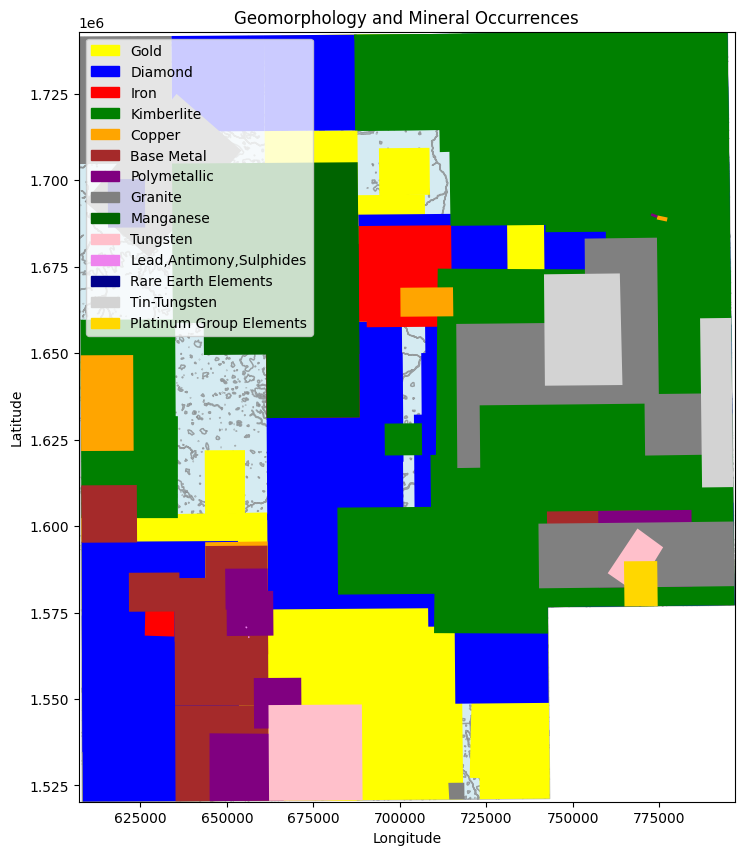

In [53]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the EPSG code for a suitable projected CRS (e.g., UTM Zone 43N for India)
projected_crs = 'EPSG:32643'

# Reproject geomorphology and mineral GeoDataFrames to the new CRS
geomorph_gdf = geomorph_gdf.to_crs(projected_crs)
mineral_gdf = mineral_gdf.to_crs(projected_crs)

# Define color mapping for minerals (you can adjust this based on your data)
commodity_colors = {
    'Gold': 'yellow',
    'Diamond': 'blue',
    'Iron': 'red',
    'Kimberlite': 'green',
    'Copper': 'orange',
    'Base Metal': 'brown',
    'Polymetallic': 'purple',
    'Granite': 'gray',
    'Manganese': 'darkgreen',
    'Tungsten': 'pink',
    'Lead,Antimony,Sulphides': 'violet',
    'Rare Earth Elements': 'darkblue',
    'Tin-Tungsten': 'lightgray',
    'Platinum Group Elements': 'gold',
    # You can add more commodities and colors here
}

# Create plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot geomorphology polygons in light blue
geomorph_gdf.plot(ax=ax, color='lightblue', edgecolor='gray', alpha=0.5)

# Loop through each commodity and plot its occurrences
for commodity, color in commodity_colors.items():
    # Filter mineral occurrences based on the commodity type
    mineral_subset = mineral_gdf[mineral_gdf['commodity'] == commodity]
    
    # Check if there are any occurrences of this commodity
    if not mineral_subset.empty:
        # Plot mineral occurrences with the specific color
        mineral_subset.plot(ax=ax, color=color, markersize=10, label=commodity)

# Custom legend for commodities
legend_handles = [mpatches.Patch(color=color, label=commodity) for commodity, color in commodity_colors.items()]
plt.legend(handles=legend_handles, loc='upper left')

# Add title and axis labels
plt.title("Geomorphology and Mineral Occurrences")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Optional: Adjust axis limits based on geomorph data
xmin, ymin, xmax, ymax = geomorph_gdf.bounds.minx.min(), geomorph_gdf.bounds.miny.min(), geomorph_gdf.bounds.maxx.max(), geomorph_gdf.bounds.maxy.max()
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# Show the plot
plt.show()

# Dashboard

from IPython.display import display, HTML

display(HTML('<a href="https://mineral-dashboard-ekzbn4cyuyrzm9tic9dbys.streamlit.app/" target="_blank">🔗 Click here to view the Streamlit Dashboard</a>'))
